In [1]:
import pandas as pd

df = pd.read_csv('drug200.csv')

In [2]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [12]:
df.select_dtypes(include='object').nunique()


,0
Sex,2
BP,3
Cholesterol,2
Drug,5


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

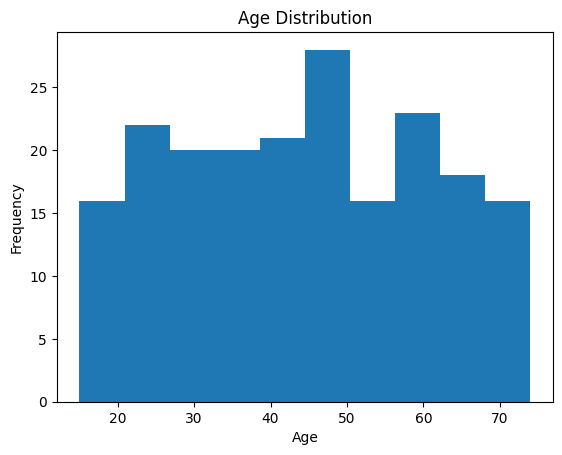

In [14]:
plt.hist(df['Age'],bins = 10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

“The histogram shows that the age distribution is relatively balanced between 20 and 50 years, with a clear peak approximately between 25 and 45 years. After the age of 50, the frequency gradually decreases, indicating that there are fewer older patients in the dataset compared to younger age groups.”

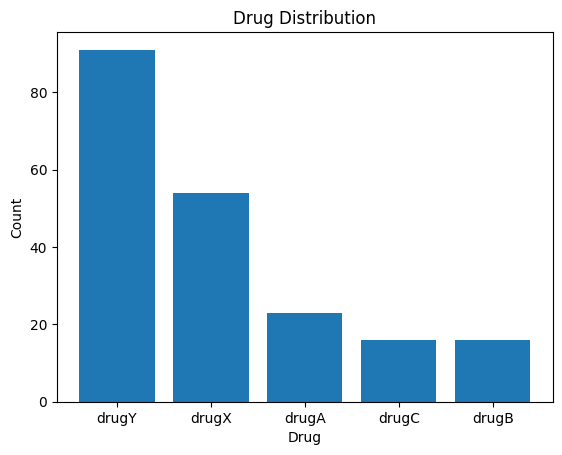

In [19]:
drug_counts = df['Drug'].value_counts()
plt.bar(drug_counts.index, drug_counts.values)
plt.title('Drug Distribution')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

“The bar chart shows that Drug Y is the most frequent, with more than 80 cases, followed by Drug X with around 45 cases. Drug A appears approximately 20 times, while Drugs C and B are the least frequent, each with around 15–17 cases. This indicates that the dataset is somewhat imbalanced, as Drug Y is significantly more represented than the other drugs.”

In [20]:
df_ohe = pd.get_dummies(df, columns=['Sex','BP','Cholesterol'])

In [21]:
df_ohe.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,drugY,True,False,True,False,False,True,False
1,47,13.093,drugC,False,True,False,True,False,True,False
2,47,10.114,drugC,False,True,False,True,False,True,False
3,28,7.798,drugX,True,False,False,False,True,True,False
4,61,18.043,drugY,True,False,False,True,False,True,False


In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_ohe['Drug_encoded'] = encoder.fit_transform(df_ohe['Drug'])

In [24]:
df_ohe[['Drug', 'Drug_encoded']].head()


,Drug,Drug_encoded
0,drugY,4
1,drugC,2
2,drugC,2
3,drugX,3
4,drugY,4


In [32]:
y = df_ohe['Drug_encoded']
X = df_ohe.drop(['Drug', 'Drug_encoded'], axis=1)


In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred_dt = dt_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Decision Tree Classification Report:\n', classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test)

In [46]:
print('"Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test , y_pred_rf))

"Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [47]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.0 MB/s eta 0:00:00


2026-02-03 07:01:04.225 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 07:01:04.226 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 07:01:04.696 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-03 07:01:04.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 07:01:04.699 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 07:01:04.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 07:01:04.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

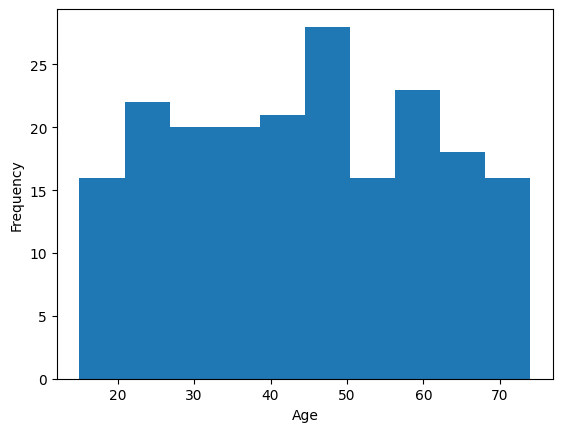

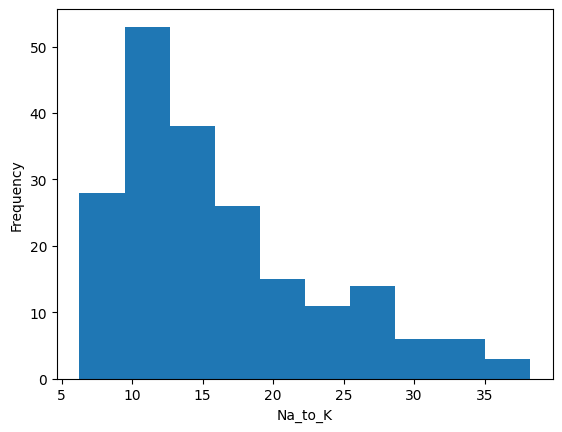

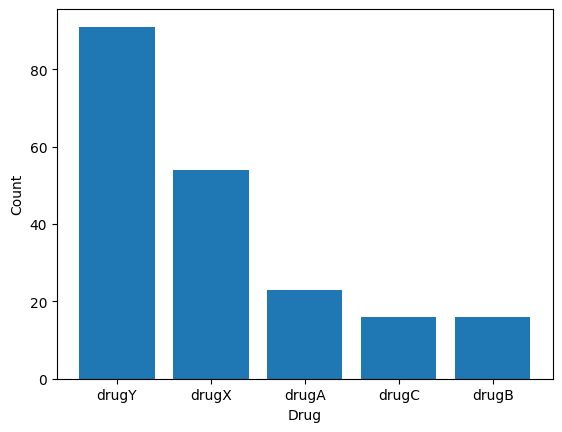

In [48]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load Data
# -----------------------------
df = pd.read_csv("drug200.csv")

st.set_page_config(page_title="Drug Dataset Dashboard", layout="wide")

# -----------------------------
# Title & Description
# -----------------------------
st.title("Drugs A, B, C, X, Y — Dataset Overview")

st.markdown("""
This dashboard provides an overview of the drug dataset used for
Decision Tree and Random Forest classification.
""")

# -----------------------------
# Basic Info (Metrics)
# -----------------------------
col1, col2, col3 = st.columns(3)

col1.metric("Number of Patients", len(df))
col2.metric("Min Age", df['Age'].min())
col3.metric("Max Age", df['Age'].max())

# -----------------------------
# Distributions (Text Summary)
# -----------------------------
st.subheader("Categorical Distributions")

col4, col5, col6 = st.columns(3)

with col4:
    st.markdown("### Sex Distribution")
    st.write(df['Sex'].value_counts(normalize=True) * 100)

with col5:
    st.markdown("### Blood Pressure")
    st.write(df['BP'].value_counts(normalize=True) * 100)

with col6:
    st.markdown("### Cholesterol")
    st.write(df['Cholesterol'].value_counts(normalize=True) * 100)

# -----------------------------
# Plots
# -----------------------------
st.subheader("Numerical Distributions")

col7, col8 = st.columns(2)

with col7:
    st.markdown("### Age Distribution")
    fig, ax = plt.subplots()
    ax.hist(df['Age'], bins=10)
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")
    st.pyplot(fig)

with col8:
    st.markdown("### Na_to_K Distribution")
    fig, ax = plt.subplots()
    ax.hist(df['Na_to_K'], bins=10)
    ax.set_xlabel("Na_to_K")
    ax.set_ylabel("Frequency")
    st.pyplot(fig)

# -----------------------------
# Drug Distribution
# -----------------------------
st.subheader("Drug Distribution")

drug_counts = df['Drug'].value_counts()

fig, ax = plt.subplots()
ax.bar(drug_counts.index, drug_counts.values)
ax.set_xlabel("Drug")
ax.set_ylabel("Count")
st.pyplot(fig)

# -----------------------------
# Raw Data (Optional)
# -----------------------------
with st.expander("Show Raw Data"):
    st.dataframe(df)


In [50]:
!pip install pyngrok


In [51]:
from pyngrok import ngrok
